___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [31]:
df = pd.read_csv("final_scout_dummy_g1.csv")
df

,price,km,age,hp_kw,previous_owners,displacement,cylinders,gears,consumption_comb,weight_kg,cc_Air Conditioning,cc_Air Suspension,cc_Armrest,cc_Automatic Climate Control,cc_Auxiliary Heating,cc_Cruise Control,cc_Electric Starter,cc_Electric Tailgate,cc_Electrical Side Mirrors,cc_Electrically Adjustable Seats,cc_Electrically Heated Windshield,cc_Heads-Up Display,cc_Heated Steering Wheel,cc_Hill Holder,cc_Keyless Central Door Lock,cc_Leather Seats,cc_Leather Steering Wheel,cc_Light Sensor,cc_Lumbar Support,cc_Massage Seats,cc_Multi-Function Steering Wheel,cc_Navigation System,cc_Panorama Roof,cc_Park Distance Control,cc_Parking Assist System Camera,cc_Parking Assist System Self-Steering,cc_Parking Assist System Sensors Front,cc_Parking Assist System Sensors Rear,cc_Power Windows,cc_Rain Sensor,cc_Seat Heating,cc_Seat Ventilation,cc_Split Rear Seats,cc_Start-Stop System,cc_Sunroof,cc_Tinted Windows,cc_Wind Deflector,cc_Windshield,em_Bluetooth,em_CD player,...,ss_Fog Lights,ss_Head Airbag,ss_Immobilizer,ss_Isofix,ss_Lane Departure Warning System,ss_Led Daytime Running Lights,ss_Led Headlights,ss_Night View Assist,ss_Passenger-Side Airbag,ss_Power Steering,ss_Rear Airbag,ss_Side Airbag,ss_Tire Pressure Monitoring System,ss_Traction Control,ss_Traffic Sign Recognition,ss_Xenon Headlights,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,paint_type_Perl effect,paint_type_Uni/basic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,fuel_Diesel,fuel_LPG/CNG,fuel_others,upholstery_type_Full leather,upholstery_type_Part leather,upholstery_type_Velour,upholstery_type_alcantara
0,15770,56013,3,66,2,1.422,3.0,5,3.8,1220,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
1,14500,80000,2,141,1,1.798,4.0,7,5.6,1255,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,...,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,14640,83450,3,85,1,1.598,4.0,5,3.8,1255,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
3,14500,73000,3,66,1,1.422,3.0,6,3.8,1195,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,...,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
4,16790,16200,3,66,1,1.422,3.0,5,4.1,1195,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,...,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15877,39950,0,0,147,1,1.997,4.0,6,5.3,1758,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0,1,0,...,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
15878,39885,9900,0,165,1,1.798,4.0,7,7.4,1708,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,...,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
15879,39875,15,0,14

In [33]:
df.head()

,price,km,age,hp_kw,previous_owners,displacement,cylinders,gears,consumption_comb,weight_kg,cc_Air Conditioning,cc_Air Suspension,cc_Armrest,cc_Automatic Climate Control,cc_Auxiliary Heating,cc_Cruise Control,cc_Electric Starter,cc_Electric Tailgate,cc_Electrical Side Mirrors,cc_Electrically Adjustable Seats,cc_Electrically Heated Windshield,cc_Heads-Up Display,cc_Heated Steering Wheel,cc_Hill Holder,cc_Keyless Central Door Lock,cc_Leather Seats,cc_Leather Steering Wheel,cc_Light Sensor,cc_Lumbar Support,cc_Massage Seats,cc_Multi-Function Steering Wheel,cc_Navigation System,cc_Panorama Roof,cc_Park Distance Control,cc_Parking Assist System Camera,cc_Parking Assist System Self-Steering,cc_Parking Assist System Sensors Front,cc_Parking Assist System Sensors Rear,cc_Power Windows,cc_Rain Sensor,cc_Seat Heating,cc_Seat Ventilation,cc_Split Rear Seats,cc_Start-Stop System,cc_Sunroof,cc_Tinted Windows,cc_Wind Deflector,cc_Windshield,em_Bluetooth,em_CD player,...,ss_Fog Lights,ss_Head Airbag,ss_Immobilizer,ss_Isofix,ss_Lane Departure Warning System,ss_Led Daytime Running Lights,ss_Led Headlights,ss_Night View Assist,ss_Passenger-Side Airbag,ss_Power Steering,ss_Rear Airbag,ss_Side Airbag,ss_Tire Pressure Monitoring System,ss_Traction Control,ss_Traffic Sign Recognition,ss_Xenon Headlights,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,paint_type_Perl effect,paint_type_Uni/basic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,fuel_Diesel,fuel_LPG/CNG,fuel_others,upholstery_type_Full leather,upholstery_type_Part leather,upholstery_type_Velour,upholstery_type_alcantara
0,15770,56013,3,66,2,1.422,3.0,5,3.8,1220,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
1,14500,80000,2,141,1,1.798,4.0,7,5.6,1255,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,...,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,14640,83450,3,85,1,1.598,4.0,5,3.8,1255,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
3,14500,73000,3,66,1,1.422,3.0,6,3.8,1195,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,...,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
4,16790,16200,3,66,1,1.422,3.0,5,4.1,1195,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,...,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15882 entries, 0 to 15881
Columns: 138 entries, price to upholstery_type_alcantara
dtypes: float64(3), int64(135)
memory usage: 16.7 MB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15882.0,18028.822503,7376.802186,4950.0,12871.5,16900.0,21900.0,74600.0
km,15882.0,31908.097595,37099.773945,0.0,1535.0,20346.0,46602.5,317000.0
age,15882.0,1.393968,1.122774,0.0,0.0,1.0,2.0,3.0
hp_kw,15882.0,88.535386,26.637861,40.0,66.0,85.0,101.0,294.0
previous_owners,15882.0,1.039668,0.254301,0.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...
fuel_others,15882.0,0.000504,0.022439,0.0,0.0,0.0,0.0,1.0
upholstery_type_Full leather,15882.0,0.091361,0.288131,0.0,0.0,0.0,0.0,1.0
upholstery_type_Part leather,15882.0,0.132414,0.338951,0.0,0.0,0.0,0.0,1.0
upholstery_type_Velour,15882.0,0.004974,0.070354,0.0,0.0,0.0,0.0,1.0


In [36]:
df.corr()

,price,km,age,hp_kw,previous_owners,displacement,cylinders,gears,consumption_comb,weight_kg,cc_Air Conditioning,cc_Air Suspension,cc_Armrest,cc_Automatic Climate Control,cc_Auxiliary Heating,cc_Cruise Control,cc_Electric Starter,cc_Electric Tailgate,cc_Electrical Side Mirrors,cc_Electrically Adjustable Seats,cc_Electrically Heated Windshield,cc_Heads-Up Display,cc_Heated Steering Wheel,cc_Hill Holder,cc_Keyless Central Door Lock,cc_Leather Seats,cc_Leather Steering Wheel,cc_Light Sensor,cc_Lumbar Support,cc_Massage Seats,cc_Multi-Function Steering Wheel,cc_Navigation System,cc_Panorama Roof,cc_Park Distance Control,cc_Parking Assist System Camera,cc_Parking Assist System Self-Steering,cc_Parking Assist System Sensors Front,cc_Parking Assist System Sensors Rear,cc_Power Windows,cc_Rain Sensor,cc_Seat Heating,cc_Seat Ventilation,cc_Split Rear Seats,cc_Start-Stop System,cc_Sunroof,cc_Tinted Windows,cc_Wind Deflector,cc_Windshield,em_Bluetooth,em_CD player,...,ss_Fog Lights,ss_Head Airbag,ss_Immobilizer,ss_Isofix,ss_Lane Departure Warning System,ss_Led Daytime Running Lights,ss_Led Headlights,ss_Night View Assist,ss_Passenger-Side Airbag,ss_Power Steering,ss_Rear Airbag,ss_Side Airbag,ss_Tire Pressure Monitoring System,ss_Traction Control,ss_Traffic Sign Recognition,ss_Xenon Headlights,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,paint_type_Perl effect,paint_type_Uni/basic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,fuel_Diesel,fuel_LPG/CNG,fuel_others,upholstery_type_Full leather,upholstery_type_Part leather,upholstery_type_Velour,upholstery_type_alcantara
price,1.000000,-0.400767,-0.469285,0.696166,-0.101520,0.435161,0.003552,0.502665,0.282064,0.417637,0.056323,0.064647,0.282657,0.414712,0.034071,0.115997,-0.006163,0.293056,0.014725,0.262235,0.126321,0.332461,0.127475,0.020576,0.248897,0.027746,0.197233,0.300757,0.201472,0.282671,0.106111,0.325805,0.225973,0.365336,0.312426,0.284239,0.321010,0.297046,-0.014398,0.344398,0.274944,0.191970,-0.000692,0.212065,0.170071,0.031018,0.006719,0.007062,0.029735,-0.079522,...,-0.042671,-0.038652,0.083338,-0.034026,0.384902,0.129972,0.434674,0.074153,0.001855,-0.046706,0.000661,0.017106,0.041396,0.091083,0.349199,0.187116,0.010942,0.196810,-0.128090,-0.379042,0.205839,-0.298312,-0.029238,0.421451,0.030057,-0.020487,-0.004845,-0.069596,-0.041072,0.044327,-0.012791,0.401126,0.045713,0.013065,0.266296,0.112784,-0.366806,-0.050000,-0.033487,-0.431595,0.120588,-0.206148,-0.004243,0.018786,-0.074093,-0.007583,0.368689,0.164689,0.001086,0.025072
km,-0.400767,1.000000,0.755820,0.002811,0.088906,0.183615,0.225991,0.018701,-0.313055,0.165466,0.027498,0.021015,0.044391,0.010723,0.054844,0.013653,0.019016,0.011225,-0.058774,0.135333,-0.074938,-0.041444,-0.113102,-0.094999,-0.043652,0.034302,-0.047705,-0.107249,0.053035,-0.038040,-0.036692,0.071115,0.043811,-0.096297,-0.077718,-0.039494,-0.022393,-0.052422,-0.015333,-0.084221,-0.077975,0.061247,0.125569,-0.009944,0.042200,0.068198,0.026821,0.009331,-0.032157,0.137443,...,0.053277,0.124528,-0.053464,-0.034120,-0.063950,-0.042377,-0.099658,0.030749,-0.032836,-0.017133,0.115326,-0.035195,-0.045937,-0.018871,-0.038871,0.033374,-0.001228,0.085029,0.054163,-0.077607,0.073726,-0.029105,-0.039186,0.010045,-0.006883,-0.004028,-0.028617,-0.025376,-0.037849,0.170795,0.044120,-0.013038,-0.062731,-0.084505,-0.292581,-0.262505,0.478347,0.010611,-0.032534,0.095667,0.038944,0.003825,0.000673,0.428503,-0.125635,0.003951,0.039853,0.006356,-0.012144,0.005400
age,-0.469285,0.755820,1.000000,-0.080975,0.227771,0.028360,0.201381,-0.039194,-0.353799,0.099300,0.013765,0.017828,0.01

In [41]:
def color_red(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val == 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

In [42]:
pd.DataFrame(df).corr().style.applymap(color_red)

In [43]:
X = df.drop(columns ="price")
y = df["price"]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [46]:
df.sample(15)

,price,km,age,hp_kw,previous_owners,displacement,cylinders,gears,consumption_comb,weight_kg,cc_Air Conditioning,cc_Air Suspension,cc_Armrest,cc_Automatic Climate Control,cc_Auxiliary Heating,cc_Cruise Control,cc_Electric Starter,cc_Electric Tailgate,cc_Electrical Side Mirrors,cc_Electrically Adjustable Seats,cc_Electrically Heated Windshield,cc_Heads-Up Display,cc_Heated Steering Wheel,cc_Hill Holder,cc_Keyless Central Door Lock,cc_Leather Seats,cc_Leather Steering Wheel,cc_Light Sensor,cc_Lumbar Support,cc_Massage Seats,cc_Multi-Function Steering Wheel,cc_Navigation System,cc_Panorama Roof,cc_Park Distance Control,cc_Parking Assist System Camera,cc_Parking Assist System Self-Steering,cc_Parking Assist System Sensors Front,cc_Parking Assist System Sensors Rear,cc_Power Windows,cc_Rain Sensor,cc_Seat Heating,cc_Seat Ventilation,cc_Split Rear Seats,cc_Start-Stop System,cc_Sunroof,cc_Tinted Windows,cc_Wind Deflector,cc_Windshield,em_Bluetooth,em_CD player,...,ss_Fog Lights,ss_Head Airbag,ss_Immobilizer,ss_Isofix,ss_Lane Departure Warning System,ss_Led Daytime Running Lights,ss_Led Headlights,ss_Night View Assist,ss_Passenger-Side Airbag,ss_Power Steering,ss_Rear Airbag,ss_Side Airbag,ss_Tire Pressure Monitoring System,ss_Traction Control,ss_Traffic Sign Recognition,ss_Xenon Headlights,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,paint_type_Perl effect,paint_type_Uni/basic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,fuel_Diesel,fuel_LPG/CNG,fuel_others,upholstery_type_Full leather,upholstery_type_Part leather,upholstery_type_Velour,upholstery_type_alcantara
11150,9850,108000,3,88,1,1.598000,4.0,6,3.90,1596,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0
8031,15816,0,0,81,1,1.598000,4.0,6,3.00,1350,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
1497,16470,20407,1,66,1,1.422000,3.0,5,4.10,1345,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,...,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
12031,22214,27000,1,100,1,1.598000,4.0,6,5.10,1440,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,...,1,1,0,1,1,1,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
7323,15200,25600,1,81,1,1.598000,4.0,6,3.60,1403,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
10236,10750,0,0,55,1,1.398000,4.0,5,5.27,1173,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,...,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
13679,7500,41000,3,54,1,1.149000,4.0,5,5.60,1141,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
13841,18490,10564,1,164,1,1.618000,4.0,5,5.90,1280,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,...,1,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
5392,24950,50,0,85,1,1.598000,4.0,6,4.50,1255,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,1,0,1

In [62]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11117, 137)
Train target shape   :  (11117,)
Test features shape  :  (4765, 137)
Test target shape    :  (4765,)


In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Robustscaler is used when outlier could be present
# scaler = StandardScaler()
scaler = MinMaxScaler()

In [84]:
scaler.fit(X_train)

MinMaxScaler()

In [85]:
X_train_scaled = scaler.transform(X_train) 

In [86]:
X_test_scaled = scaler.transform(X_test)

In [87]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136
mean,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136
mean,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [89]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [90]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [91]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [92]:
lm.coef_

array([-1.18710477e+04, -4.71533487e+03,  2.28276139e+04,  1.98144315e+02,
       -1.89508319e+03,  8.91676060e+02,  3.54947761e+03,  7.39422424e+02,
       -1.72259811e+03,  3.82053967e+02, -3.80895939e+02, -5.23736014e+01,
        2.78560936e+02, -4.03788830e+01,  2.13250159e+02, -1.13461682e+03,
        1.67866349e+02,  2.94619635e+01, -2.31950363e+01,  4.05135281e+02,
        2.08968754e+03,  3.76051660e+02,  2.00696154e+02,  6.40464169e+01,
       -1.08075387e+03,  2.24511500e+02,  1.74469730e+02, -2.50731038e+02,
        6.36754400e+02,  5.03669684e+01,  3.38048705e+02, -3.04236850e+02,
        6.45534234e+02, -1.16127236e+02,  9.07083063e+02,  2.94159203e+02,
       -4.81355107e+02,  1.59901226e+02, -2.38202844e+02,  9.54771065e+01,
        4.06539388e+02, -1.71367469e+02, -7.66648721e+00,  6.25614106e+02,
        3.80130871e+01, -4.35213434e+02, -3.32543983e+02, -5.22600825e+02,
       -3.15827980e+01,  7.78344073e+02,  9.53832229e+01, -1.52948575e+01,
       -4.21942668e+00,  

In [93]:
lm.intercept_

21412.274383267726

In [94]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [95]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
8261,13290,12241.026231,1048.973769
4344,16690,17480.162588,-790.162588
5665,25410,25982.777305,-572.777305
13879,9400,8136.331662,1263.668338
13077,15890,14634.728081,1255.271919
...,...,...,...
10217,10850,12026.854526,-1176.854526
11803,24490,24450.429511,39.570489
2564,22100,20264.059983,1835.940017
5380,24450,22121.506301,2328.493699


In [74]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
8261,13290,12241.134295,1048.865705
4344,16690,17480.692294,-790.692294
5665,25410,25982.975690,-572.975690
13879,9400,8136.306541,1263.693459
13077,15890,14634.259039,1255.740961
4347,16690,14994.512528,1695.487472
8268,13663,16384.218889,-2721.218889
11047,12595,12860.730708,-265.730708
7030,18490,17771.228592,718.771408
795,15900,19215.850967,-3315.850967


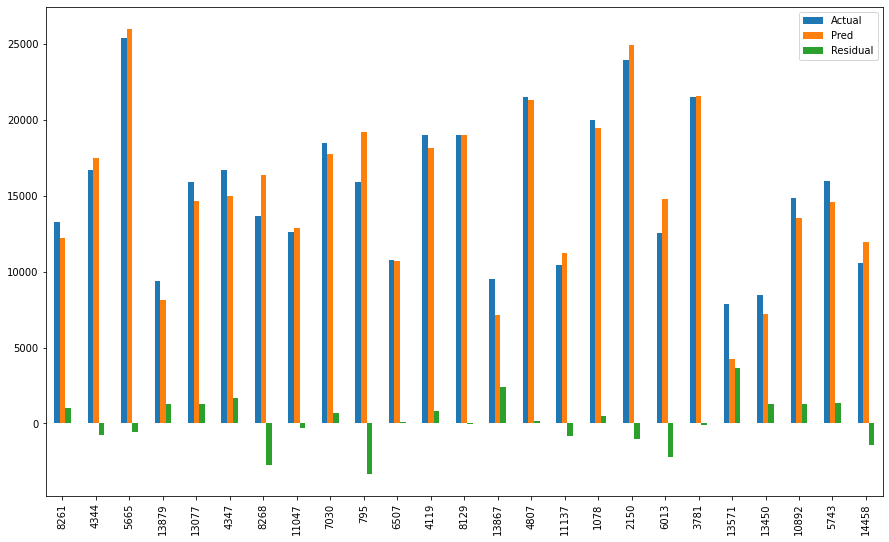

In [96]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [98]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") 
ls

,linear_train,linear_test
R2,8.902944e-01,8.907395e-01
mae,1.705049e+03,1.722332e+03
mse,5.940445e+06,6.012771e+06
rmse,2.437303e+03,2.452095e+03


In [99]:
from sklearn.model_selection import cross_validate

In [100]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [101]:
scores

{'fit_time': array([0.12195969, 0.12248802, 0.0949688 , 0.09496999, 0.10996461]),
 'score_time': array([0.00199986, 0.00299835, 0.00200033, 0.0019989 , 0.00199962]),
 'test_r2': array([ 8.88046930e-01,  8.86240738e-01, -3.08118135e+19,  8.90472287e-01,
         8.82718790e-01]),
 'test_neg_mean_absolute_error': array([-1.71503984e+03, -1.74151577e+03, -8.28206149e+11, -1.77464513e+03,
        -1.73465788e+03]),
 'test_neg_mean_squared_error': array([-5.90968043e+06, -5.75611083e+06, -1.52481221e+27, -6.76007173e+06,
        -6.57547348e+06]),
 'test_neg_root_mean_squared_error': array([-2.43098343e+03, -2.39918962e+03, -3.90488440e+13, -2.60001379e+03,
        -2.56426861e+03])}

In [102]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.121960,0.002000,8.880469e-01,-1.715040e+03,-5.909680e+06,-2.430983e+03
2,0.122488,0.002998,8.862407e-01,-1.741516e+03,-5.756111e+06,-2.399190e+03
3,0.094969,0.002000,-3.081181e+19,-8.282061e+11,-1.524812e+27,-3.904884e+13
4,0.094970,0.001999,8.904723e-01,-1.774645e+03,-6.760072e+06,-2.600014e+03
5,0.109965,0.002000,8.827188e-01,-1.734658e+03,-6.575473e+06,-2.564269e+03


In [103]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                            -6.162363e+18
test_neg_mean_absolute_error       -1.656412e+11
test_neg_mean_squared_error        -3.049624e+26
test_neg_root_mean_squared_error   -7.809769e+12
dtype: float64

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [104]:
from sklearn.linear_model import Ridge

In [105]:
ridge_model = Ridge(alpha=1, random_state=42)

In [107]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [108]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [109]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,8.902252e-01,8.908147e-01
mae,1.702692e+03,1.719621e+03
mse,5.944192e+06,6.008635e+06
rmse,2.438071e+03,2.451252e+03


In [110]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,8.902944e-01,8.907395e-01,8.902252e-01,8.908147e-01
mae,1.705049e+03,1.722332e+03,1.702692e+03,1.719621e+03
mse,5.940445e+06,6.012771e+06,5.944192e+06,6.008635e+06
rmse,2.437303e+03,2.452095e+03,2.438071e+03,2.451252e+03


In [111]:
from sklearn.linear_model import RidgeCV

In [112]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [113]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [115]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [116]:
ridge_cv_model.alpha_

0.62

In [117]:
ridge_cv_model.best_score_

-2485.649493330925

In [119]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [120]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,8.902658e-01,8.908071e-01
mae,1.703441e+03,1.720524e+03
mse,5.941990e+06,6.009049e+06
rmse,2.437620e+03,2.451336e+03


In [121]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,8.902944e-01,8.907395e-01,8.902252e-01,8.908147e-01,8.902658e-01,8.908071e-01
mae,1.705049e+03,1.722332e+03,1.702692e+03,1.719621e+03,1.703441e+03,1.720524e+03
mse,5.940445e+06,6.012771e+06,5.944192e+06,6.008635e+06,5.941990e+06,6.009049e+06
rmse,2.437303e+03,2.452095e+03,2.438071e+03,2.451252e+03,2.437620e+03,2.451336e+03


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [122]:
from sklearn.linear_model import Lasso, LassoCV

In [123]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [124]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [125]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,8.900085e-01,8.912319e-01
mae,1.704694e+03,1.717416e+03
mse,5.955924e+06,5.985674e+06
rmse,2.440476e+03,2.446564e+03


In [126]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,8.902944e-01,8.907395e-01,8.902252e-01,8.908147e-01,8.902658e-01,8.908071e-01,8.900085e-01,8.912319e-01
mae,1.705049e+03,1.722332e+03,1.702692e+03,1.719621e+03,1.703441e+03,1.720524e+03,1.704694e+03,1.717416e+03
mse,5.940445e+06,6.012771e+06,5.944192e+06,6.008635e+06,5.941990e+06,6.009049e+06,5.955924e+06,5.985674e+06
rmse,2.437303e+03,2.452095e+03,2.438071e+03,2.451252e+03,2.437620e+03,2.451336e+03,2.440476e+03,2.446564e+03


In [133]:
alpha_space_lasso = np.linspace(1, 10, 100)
alpha_space_lasso

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

In [134]:
lasso_cv_model = LassoCV(alphas = alpha_space_lasso, cv = 5, max_iter=100000, random_state=42)

In [135]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,...
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27272727,
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ]),
        cv=

In [136]:
lasso_cv_model.alpha_

1.1818181818181819

In [137]:
np.where(alpha_space_lasso[::-1]==lasso_cv_model.alpha_)

(array([97], dtype=int64),)

In [138]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [139]:
lasso_cv_model.mse_path_[99].mean()

6163633.676603253

In [140]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [141]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,8.899130e-01,8.912624e-01
mae,1.704983e+03,1.716878e+03
mse,5.961094e+06,5.983995e+06
rmse,2.441535e+03,2.446220e+03


In [142]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1).T

,R2,mae,mse,rmse
linear_train,0.890294,1705.048587,5.940445e+06,2437.302751
linear_test,0.890740,1722.332378,6.012771e+06,2452.095168
ridge_train,0.890225,1702.692171,5.944192e+06,2438.071359
ridge_test,0.890815,1719.621161,6.008635e+06,2451.251661
ridge_cv_train,0.890266,1703.441082,5.941990e+06,2437.619710
ridge_cv_test,0.890807,1720.523842,6.009049e+06,2451.336070
lasso_train,0.890009,1704.693827,5.955924e+06,2440.476155
lasso_test,0.891232,1717.416370,5.985674e+06,2446.563771
lasso_cv_train,0.889913,1704.982835,5.961094e+06,2441.535167
lasso_cv_test,0.891262,1716.878213,5.983995e+06,2446.220458


In [143]:
lasso_cv_model.coef_

array([-1.17497335e+04, -4.73716865e+03,  2.27556544e+04,  0.00000000e+00,
       -1.50750020e+03,  1.76696329e+02,  3.27730303e+03,  1.48575083e+02,
       -1.46854660e+03,  3.51647770e+02, -1.27533822e+02, -3.19893331e+01,
        2.77828415e+02, -3.07393531e-01,  1.87611411e+02, -0.00000000e+00,
        1.26999853e+02,  2.46346897e+01, -2.10819446e+01,  3.87109500e+02,
        2.07152829e+03,  3.59709504e+02,  1.93006696e+02,  7.58006798e+01,
       -8.21432511e+02,  2.31106989e+02,  1.51359930e+02, -2.41163449e+02,
        5.38617853e+02,  4.10489967e+01,  3.40132742e+02, -2.25527504e+02,
        6.36989702e+02, -8.27973636e+01,  8.91010959e+02,  2.74187935e+02,
       -4.59700133e+02,  1.37052312e+02, -2.12330638e+02,  9.45510112e+01,
        4.09246406e+02, -1.54599460e+02, -4.54038325e+00,  5.72957113e+02,
        0.00000000e+00, -3.22798223e+01, -0.00000000e+00, -5.17172001e+02,
       -2.09335539e+01,  7.56303514e+02,  7.25554330e+01, -5.73069225e+00,
       -0.00000000e+00,  

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [144]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [146]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # l1_ratio: 1: Lasso or 0:Ridge
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [147]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [148]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,5.913949e-01,5.916117e-01
mae,3.418234e+03,3.443281e+03
mse,2.212554e+07,2.247423e+07
rmse,4.703779e+03,4.740699e+03


In [149]:
pd.concat([ls,rs,lss, es], axis = 1).T

,R2,mae,mse,rmse
linear_train,0.890294,1705.048587,5.940445e+06,2437.302751
linear_test,0.890740,1722.332378,6.012771e+06,2452.095168
ridge_train,0.890225,1702.692171,5.944192e+06,2438.071359
ridge_test,0.890815,1719.621161,6.008635e+06,2451.251661
lasso_train,0.890009,1704.693827,5.955924e+06,2440.476155
lasso_test,0.891232,1717.416370,5.985674e+06,2446.563771
elastic_train,0.591395,3418.234492,2.212554e+07,4703.779141
elastic_test,0.591612,3443.280684,2.247423e+07,4740.699132


In [150]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space_lasso, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [151]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.8181...
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
       

In [152]:
elastic_cv_model.alpha_

1.1818181818181819

In [156]:
elastic_cv_model.l1_ratio_

1.0

In [157]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [158]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,8.899130e-01,8.912624e-01
mae,1.704983e+03,1.716878e+03
mse,5.961094e+06,5.983995e+06
rmse,2.441535e+03,2.446220e+03


In [159]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1).T

,R2,mae,mse,rmse
linear_train,0.890294,1705.048587,5.940445e+06,2437.302751
linear_test,0.890740,1722.332378,6.012771e+06,2452.095168
ridge_train,0.890225,1702.692171,5.944192e+06,2438.071359
ridge_test,0.890815,1719.621161,6.008635e+06,2451.251661
ridge_cv_train,0.890266,1703.441082,5.941990e+06,2437.619710
ridge_cv_test,0.890807,1720.523842,6.009049e+06,2451.336070
lasso_train,0.890009,1704.693827,5.955924e+06,2440.476155
lasso_test,0.891232,1717.416370,5.985674e+06,2446.563771
lasso_cv_train,0.889913,1704.982835,5.961094e+06,2441.535167
lasso_cv_test,0.891262,1716.878213,5.983995e+06,2446.220458


In [160]:
elastic_cv_model.coef_

array([-1.17497335e+04, -4.73716865e+03,  2.27556544e+04,  0.00000000e+00,
       -1.50750020e+03,  1.76696329e+02,  3.27730303e+03,  1.48575083e+02,
       -1.46854660e+03,  3.51647770e+02, -1.27533822e+02, -3.19893331e+01,
        2.77828415e+02, -3.07393531e-01,  1.87611411e+02, -0.00000000e+00,
        1.26999853e+02,  2.46346897e+01, -2.10819446e+01,  3.87109500e+02,
        2.07152829e+03,  3.59709504e+02,  1.93006696e+02,  7.58006798e+01,
       -8.21432511e+02,  2.31106989e+02,  1.51359930e+02, -2.41163449e+02,
        5.38617853e+02,  4.10489967e+01,  3.40132742e+02, -2.25527504e+02,
        6.36989702e+02, -8.27973636e+01,  8.91010959e+02,  2.74187935e+02,
       -4.59700133e+02,  1.37052312e+02, -2.12330638e+02,  9.45510112e+01,
        4.09246406e+02, -1.54599460e+02, -4.54038325e+00,  5.72957113e+02,
        0.00000000e+00, -3.22798223e+01, -0.00000000e+00, -5.17172001e+02,
       -2.09335539e+01,  7.56303514e+02,  7.25554330e+01, -5.73069225e+00,
       -0.00000000e+00,  

In [ ]:
# GridSearch

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [171]:
param_grid = {"alpha":[1.01, 1.012, 1.2, 1.5, 1.6, 1.7, 1.1818],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [172]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [173]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=1.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=1.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=1.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=1.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=1.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=1.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=1.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=1.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=1.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=1.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=1.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=1.01,

[CV] END ..............................alpha=1.2, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=1.2, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=1.2, l1_ratio=1; total time=   0.1s
[CV] END ............................alpha=1.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=1.5, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

[CV] END ..............................alpha=1.7, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=1.7, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=1.7, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=1.7, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=1.7, l1_ratio=1; total time=   0.1s
[CV] END .........................alpha=1.1818, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=1.1818, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=1.1818, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=1.1818, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=1.1818, l1_ratio=0.1; total time=   0.0s
[CV] END .........................alpha=1.1818, l1_ratio=0.5; total time=   0.0s
[CV] END .........................alpha=1.1818, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [1.01, 1.012, 1.2, 1.5, 1.6, 1.7, 1.1818],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [174]:
grid_model.best_params_

{'alpha': 1.1818, 'l1_ratio': 1}

In [175]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.067127,0.005155,0.001600,1.199770e-03,1.01,0.1,"{'alpha': 1.01, 'l1_ratio': 0.1}",-5214.603033,-5070.790068,-5016.659391,-5683.145356,-5452.057501,-5287.451070,248.695076,43
1,0.068579,0.006404,0.001199,3.992568e-04,1.01,0.5,"{'alpha': 1.01, 'l1_ratio': 0.5}",-4652.982169,-4499.539494,-4470.506584,-5085.516306,-4885.712756,-4718.851462,235.115921,35
2,0.105644,0.016196,0.001599,8.011705e-04,1.01,0.7,"{'alpha': 1.01, 'l1_ratio': 0.7}",-4200.041191,-4036.607111,-4033.390870,-4598.396777,-4422.106751,-4258.108540,221.641255,29
3,0.145252,0.022334,0.000999,1.326602e-06,1.01,0.9,"{'alpha': 1.01, 'l1_ratio': 0.9}",-3453.078134,-3285.266337,-3325.843640,-3777.262384,-3639.557695,-3496.201638,187.040791,22
4,0.158015,0.007101,0.001200,3.998046e-04,1.01,0.95,"{'alpha': 1.01, 'l1_ratio': 0.95}",-3131.915059,-2977.374794,-3030.761511,-3417.938952,-3296.716867,-3170.941436,164.601790,15
5,0.195207,0.014877,0.001399,4.901937e-04,1.01,0.99,"{'alpha': 1.01, 'l1_ratio': 0.99}",-2706.955528,-2603.249348,-2658.918918,-2936.876461,-2838.698400,-2748.939731,122.040109,8
6,0.193742,0.015465,0.001199,3.998765e-04,1.01,1,"{'alpha': 1.01, 'l1_ratio': 1}",-2427.595783,-2391.799241,-2429.611561,-2598.324475,-2559.216083,-2481.309429,81.647862,4
7,0.064277,0.003335,0.001599,8.003951e-04,1.012,0.1,"{'alpha': 1.012, 'l1_ratio': 0.1}",-5216.496616,-5072.706524,-5018.506024,-5685.154791,-5453.955007,-5289.363793,248.738702,44
8,0.074176,0.009883,0.001398,4.895123e-04,1.012,0.5,"{'alpha': 1.012, 'l1_ratio': 0.5}",-4654.838564,-4501.435047,-4472.305006,-5087.500725,-4887.598569,-4720.735582,235.164972,36
9,0.085773,0.006271,0.001199,3.994947e-04,1.012,0.7,"{'alpha': 1.012, 'l1_ratio': 0.7}",-4201.685748,-4038.287409,-4034.970778,-4600.180369,-4423.805829,-4259.786027,221.697984,30


In [176]:
grid_model.best_index_

48

In [177]:
grid_model.best_score_

-2481.2585915769423

In [178]:
gs = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gs

,GridSearch_train,GridSearch_test
R2,8.899130e-01,8.912624e-01
mae,1.704983e+03,1.716878e+03
mse,5.961094e+06,5.983995e+06
rmse,2.441535e+03,2.446220e+03


In [179]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs, gs], axis = 1).T

,R2,mae,mse,rmse
linear_train,0.890294,1705.048587,5.940445e+06,2437.302751
linear_test,0.890740,1722.332378,6.012771e+06,2452.095168
ridge_train,0.890225,1702.692171,5.944192e+06,2438.071359
ridge_test,0.890815,1719.621161,6.008635e+06,2451.251661
ridge_cv_train,0.890266,1703.441082,5.941990e+06,2437.619710
ridge_cv_test,0.890807,1720.523842,6.009049e+06,2451.336070
lasso_train,0.890009,1704.693827,5.955924e+06,2440.476155
lasso_test,0.891232,1717.416370,5.985674e+06,2446.563771
lasso_cv_train,0.889913,1704.982835,5.961094e+06,2441.535167
lasso_cv_test,0.891262,1716.878213,5.983995e+06,2446.220458


## 7. Visually Compare Models Performance In a Graph

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___